# Нахождение геометрической вероятности

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from concurrent.futures import ThreadPoolExecutor

#Выбор радиусов
a = 1 # значение из 2a
r = 5 # кол-во  радиусов
radiuses = np.linspace(0.2*a, a,r)
radiuses = np.round(radiuses, 2)

#Находим p (вероятность)
true_probility = ((radiuses**2)*np.pi) / ((a**2)*4)
print(true_probility)

[0.03141593 0.12566371 0.28274334 0.50265482 0.78539816]


In [ ]:
# Реализация метода Монте-Карло
def monte_carlo(r, N, a):
    # Генерация случайных точек и проверка попадания в круг
    x = np.random.uniform(-a, a, N)
    y = np.random.uniform(-a, a, N)
    return np.sum(x**2 + y**2 <= r**2) / N

N = 10000000
with ThreadPoolExecutor() as executor:
    Monte_Carlo_probility = list(executor.map(lambda r: monte_carlo(r, N, a), radiuses))

print(Monte_Carlo_probility)

[np.float64(0.0313611), np.float64(0.1256526), np.float64(0.2826375), np.float64(0.5023079), np.float64(0.7855252)]


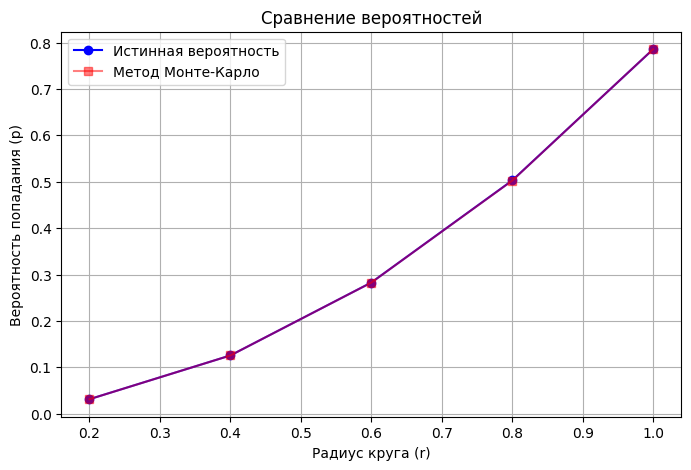

In [ ]:
#Сравнение вероятностей
plt.figure(figsize=(8, 5))
plt.plot(radiuses, true_probility, 'o-', label="Истинная вероятность", color='blue')
plt.plot(radiuses, Monte_Carlo_probility, 's-', label="Метод Монте-Карло", color='red', alpha = 0.5)

plt.xlabel("Радиус круга (r)")
plt.ylabel("Вероятность попадания (p)")
plt.title("Сравнение вероятностей")
plt.legend()
plt.grid(True)

plt.show()

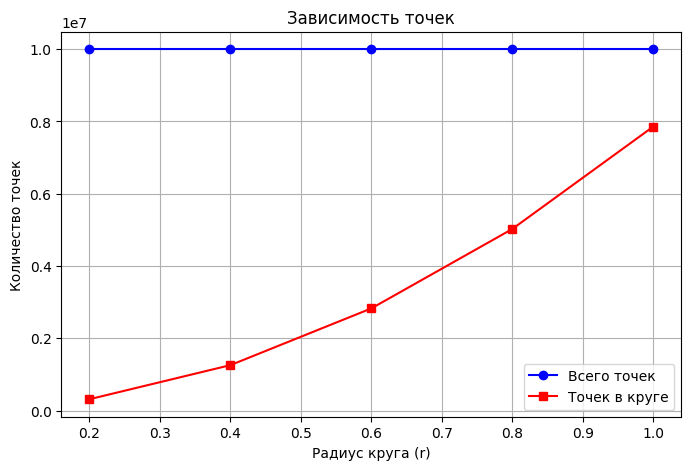

In [ ]:
# Зависимость попавших точек от радиуса
inside_points = np.array(Monte_Carlo_probility) * N

plt.figure(figsize=(8, 5))
plt.plot(radiuses, [N] * len(radiuses), 'o-', label="Всего точек", color='blue')
plt.plot(radiuses, inside_points, 's-', label="Точек в круге", color='red')
plt.xlabel("Радиус круга (r)")
plt.ylabel("Количество точек")
plt.title("Зависимость точек")
plt.legend()
plt.grid(True)
plt.show()


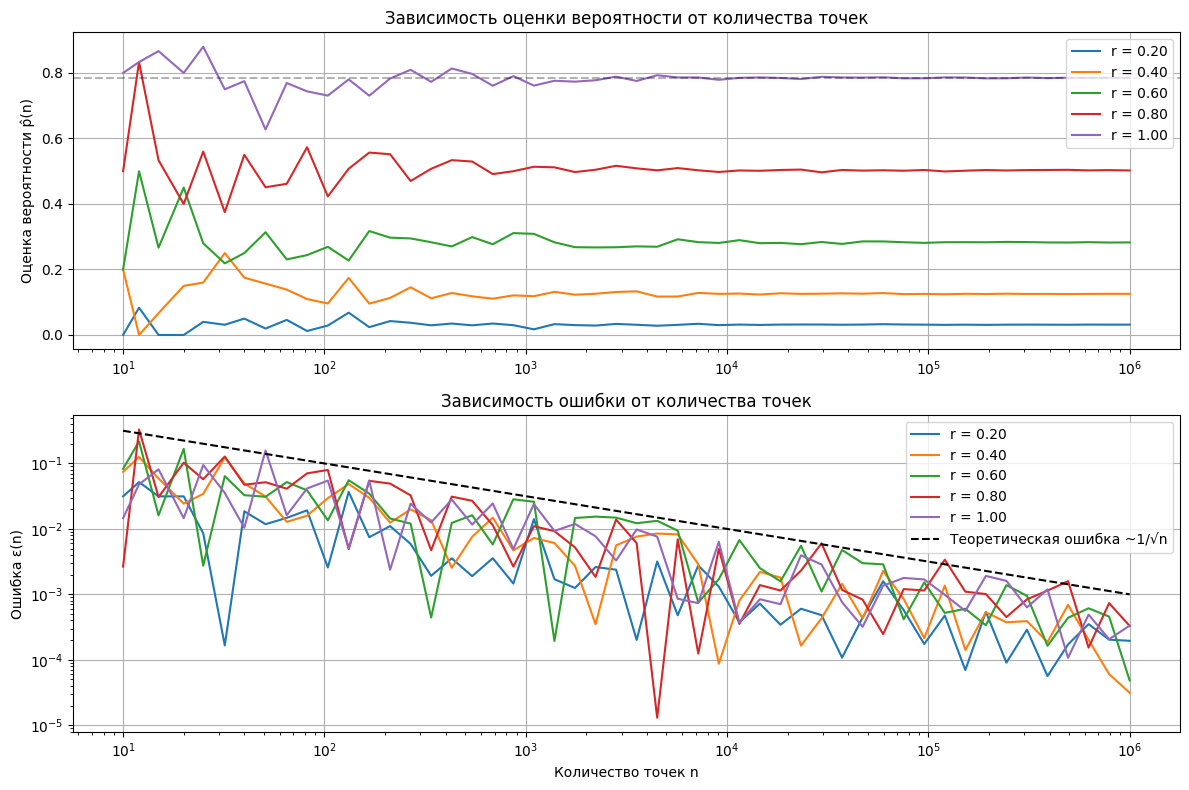

In [ ]:
#Анализ зависимости оценки от количества точек для каждого радиуса
n_values = np.logspace(1, 6, 50, dtype=int)

plt.figure(figsize=(12, 8))
for r, true_p in zip(radiuses, true_probility):
    p_hats = []
    for n in n_values:
        x = np.random.uniform(-a, a, n)
        y = np.random.uniform(-a, a, n)
        inside = np.sum(x**2 + y**2 <= r**2)
        p_hats.append(inside / n)

    # График p̂(n)
    plt.subplot(2, 1, 1)
    plt.plot(n_values, p_hats, label=f'r = {r:.2f}')

    # График ε(n)
    errors = np.abs(p_hats - true_p)
    plt.subplot(2, 1, 2)
    plt.plot(n_values, errors, label=f'r = {r:.2f}')

# Настройка графиков
plt.subplot(2, 1, 1)
plt.axhline(true_p, color='black', linestyle='--', alpha=0.3)
plt.xscale('log')
plt.ylabel('Оценка вероятности p̂(n)')
plt.title('Зависимость оценки вероятности от количества точек')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_values, 1/np.sqrt(n_values), 'k--', label='Теоретическая ошибка ~1/√n')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Количество точек n')
plt.ylabel('Ошибка ε(n)')
plt.title('Зависимость ошибки от количества точек')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

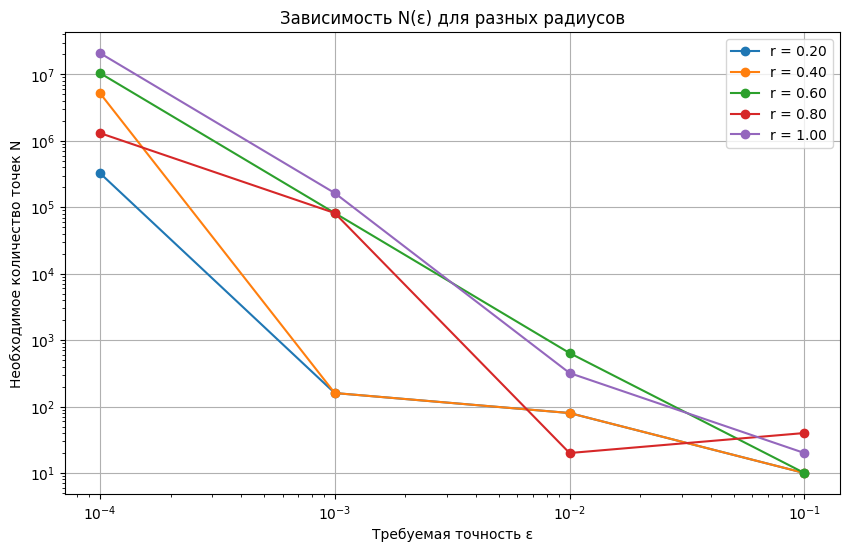

In [ ]:
# Расчет N(ε) для разных значений точности
eps_targets = [10**(-i) for i in range(1, 5)]  # ε от 0.1 до 0.0001

plt.figure(figsize=(10, 6))
for r, true_p in zip(radiuses, true_probility):
    n_required = []
    for eps_target in eps_targets:
        n = 10  # Начальное значение
        while True:
            x = np.random.uniform(-a, a, n)
            y = np.random.uniform(-a, a, n)
            p_hat = np.sum(x**2 + y**2 <= r**2) / n
            if np.abs(p_hat - true_p) <= eps_target:
                n_required.append(n)
                break
            n *= 2 # Каждый раз увеличиваем значение в 2 раза после каждой итерации

    plt.plot(eps_targets, n_required, 'o-', label=f'r = {r:.2f}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Требуемая точность ε')
plt.ylabel('Необходимое количество точек N')
plt.title('Зависимость N(ε) для разных радиусов')
plt.legend()
plt.grid(True)
plt.show()